# Метод наискорейшего градиентного спуска

In [1]:
import numpy as np

alpha = 0.75
beta = 0

A = np.array([
    [5.18 + alpha, 1.12, 0.95, 1.32, 0.83],
    [1.12, 4.28 - alpha, 2.12, 0.57, 0.91],
    [0.95, 2.12, 6.13 + alpha, 1.29, 1.57],
    [1.32, 0.57, 1.29, 4.57 - alpha, 1.25],
    [0.83, 0.91, 1.57, 1.25, 5.21 + alpha]
])

b = np.array([
    [6.19 + beta],
    [3.21],
    [4.28 - beta],
    [6.25],
    [4.95 + beta]
])

A, b


(array([[5.93, 1.12, 0.95, 1.32, 0.83],
        [1.12, 3.53, 2.12, 0.57, 0.91],
        [0.95, 2.12, 6.88, 1.29, 1.57],
        [1.32, 0.57, 1.29, 3.82, 1.25],
        [0.83, 0.91, 1.57, 1.25, 5.96]]),
 array([[6.19],
        [3.21],
        [4.28],
        [6.25],
        [4.95]]))

In [2]:
def is_diagonally_dominant(matrix):
    n = matrix.shape[0]
    for i in range(n):
        diagonal_element = abs(matrix[i, i])
        off_diagonal_sum = sum(abs(matrix[i, j]) for j in range(n) if j != i)
        if diagonal_element <= off_diagonal_sum:
            return False
    return True

is_diagonally_dominant(A)


False

у матрицы отсутствует диагональное преобладание

In [3]:
def make_diagonally_dominant(matrix):
    n = matrix.shape[0]
    constant = 0
    while not is_diagonally_dominant(matrix):
        constant += 0.01
        for i in range(n):
            matrix[i, i] += 0.01
    return matrix, constant

A_modified, added_constant = make_diagonally_dominant(A.copy())
A_modified, added_constant

(array([[7.13, 1.12, 0.95, 1.32, 0.83],
        [1.12, 4.73, 2.12, 0.57, 0.91],
        [0.95, 2.12, 8.08, 1.29, 1.57],
        [1.32, 0.57, 1.29, 5.02, 1.25],
        [0.83, 0.91, 1.57, 1.25, 7.16]]),
 1.2000000000000008)

In [4]:
is_diagonally_dominant(A_modified)

True

In [5]:
def gradient_descent_solve(A, b, eps=1e-6):
    x = np.zeros_like(b)  
    r = b - np.dot(A, x) 
    iterations = 0
    
    while np.linalg.norm(r) > eps:
        alpha = np.dot(r.T, r) / np.dot(r.T, np.dot(A, r)) 
        x = x + alpha * r  
        r = b - np.dot(A, x)
        iterations += 1
    
    return x, iterations

x_solution, num_iterations = gradient_descent_solve(A_modified, b)

x_solution, num_iterations


(array([[0.58652759],
        [0.27999094],
        [0.16449397],
        [0.91932125],
        [0.39119873]]),
 22)

In [6]:
np.linalg.solve(A_modified,b)

array([[0.58652757],
       [0.2799911 ],
       [0.16449395],
       [0.91932132],
       [0.39119875]])

## Зависимость от eps

In [8]:
# исследование от разных epsilon
eps_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
results = []

for eps in eps_values:
    x_solution, num_iterations = gradient_descent_solve(A_modified, b, eps=eps)
    results.append({"Epsilon (eps)": eps, "Iterations": num_iterations})


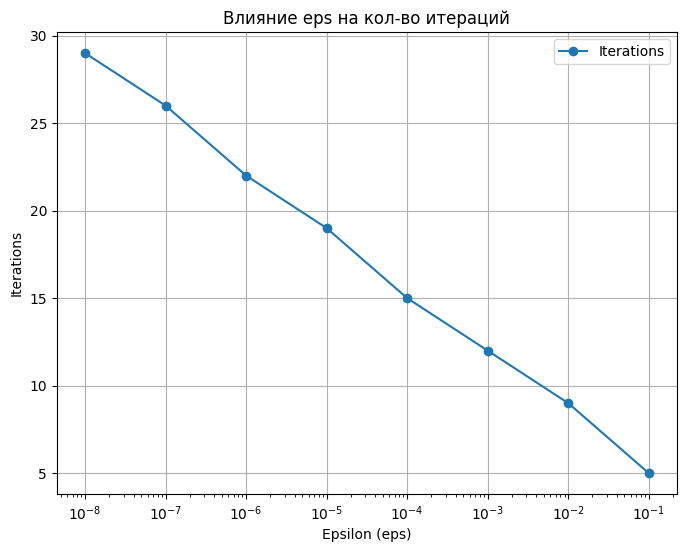

In [12]:
import matplotlib.pyplot as plt

eps_values = [result["Epsilon (eps)"] for result in results]
iterations = [result["Iterations"] for result in results]

plt.figure(figsize=(8, 6))
plt.plot(eps_values, iterations, marker='o', label='Iterations')
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Iterations')
plt.title('Влияние eps на кол-во итераций')
plt.grid(True)
plt.legend()
plt.show()

## Зависимость времени и кол-ва итераций от размерности и обусловленности матрицы

In [32]:
def generate_matrices(size):
    random_matrix = np.random.rand(size, size)
    well_conditioned = np.dot(random_matrix.T, random_matrix)
    np.fill_diagonal(well_conditioned, well_conditioned.diagonal() + size)

    while np.linalg.cond(well_conditioned) > 50:
        random_matrix = np.random.rand(size, size)
        well_conditioned = np.dot(random_matrix.T, random_matrix)
        np.fill_diagonal(well_conditioned, well_conditioned.diagonal() + size)

    poorly_conditioned = np.eye(size) + 0.01 * np.random.rand(size, size)
    poorly_conditioned = np.dot(poorly_conditioned.T, poorly_conditioned)
    poorly_conditioned[-1, -1] *= 0.001  

    while np.linalg.cond(poorly_conditioned) < 500:
        poorly_conditioned[-1, -1] *= 0.1

    # print(f"Well-Conditioned Matrix Cond. Number: {np.linalg.cond(well_conditioned)}")
    # print(f"Poorly-Conditioned Matrix Cond. Number: {np.linalg.cond(poorly_conditioned)}")

    return well_conditioned, poorly_conditioned

In [34]:
import time

matrix_sizes = [2, 5, 8, 10, 12, 15, 20, 30]  
results_timing = []

for size in matrix_sizes:
    b = np.random.rand(size, 1)

    well_conditioned, poorly_conditioned = generate_matrices(size)

    start_time = time.time()
    _, well_cond_iter = gradient_descent_solve(well_conditioned, b, eps=1e-6)
    well_time = time.time() - start_time

    start_time = time.time()
    _, poor_cond_iter = gradient_descent_solve(poorly_conditioned, b, eps=1e-6)
    poor_time = time.time() - start_time
    
    results_timing.append({
        "Matrix Size": size,
        "Well-Conditioned Time (s)": well_time,
        "Well-Conditioned Iteration": well_cond_iter,
        "Poorly-Conditioned Time (s)": poor_time,
        "Poorly-Conditioned Iteration": poor_cond_iter
    })

C:\Users\Huawei\AppData\Local\Temp\ipykernel_11652\556338144.py:7: RuntimeWarning: invalid value encountered in divide
  alpha = np.dot(r.T, r) / np.dot(r.T, np.dot(A, r))  # Optimal step size


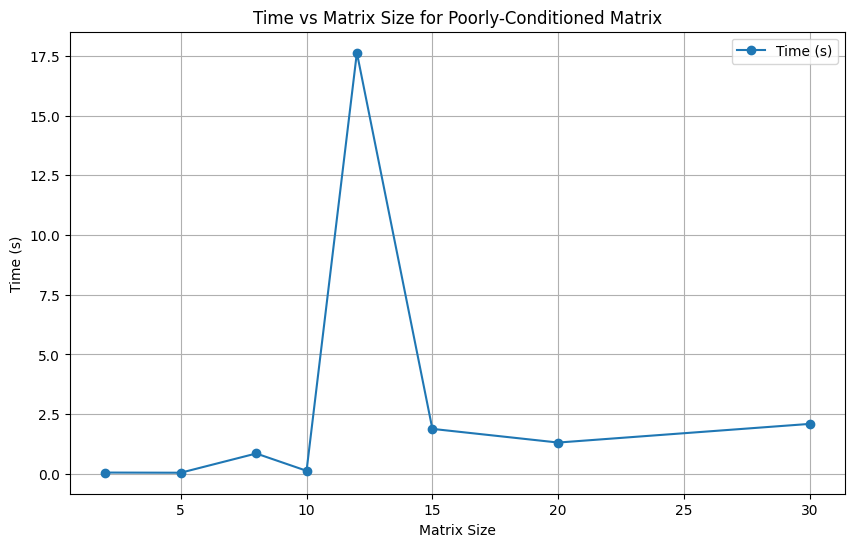

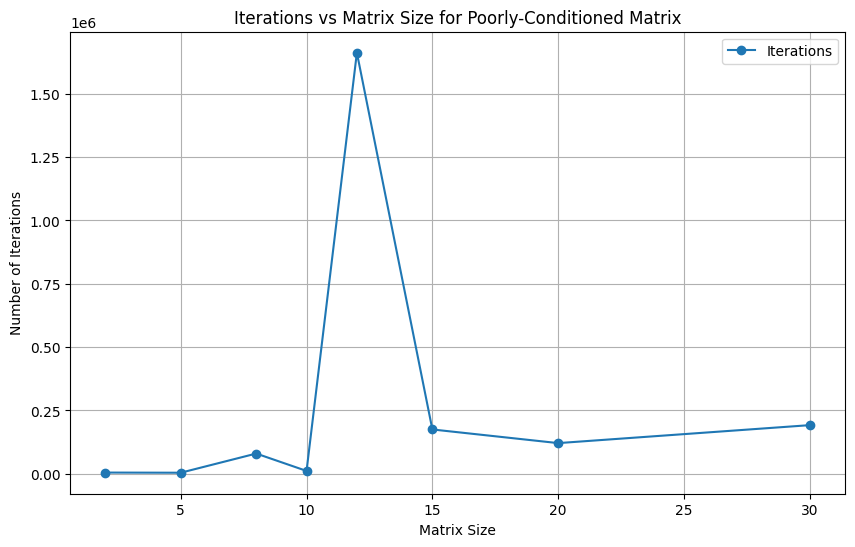

In [36]:
matrix_sizes = [result["Matrix Size"] for result in results_timing]
poor_times = [result["Poorly-Conditioned Time (s)"] for result in results_timing]
poor_iterations = [result["Poorly-Conditioned Iteration"] for result in results_timing]

#Плохо обусловленные матрицы
plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, poor_times, marker='o', label="Time (s)")
plt.xlabel("Matrix Size")
plt.ylabel("Time (s)")
plt.title("Time vs Matrix Size for Poorly-Conditioned Matrix")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, poor_iterations, marker='o', label="Iterations")
plt.xlabel("Matrix Size")
plt.ylabel("Number of Iterations")
plt.title("Iterations vs Matrix Size for Poorly-Conditioned Matrix")
plt.grid()
plt.legend()
plt.show()


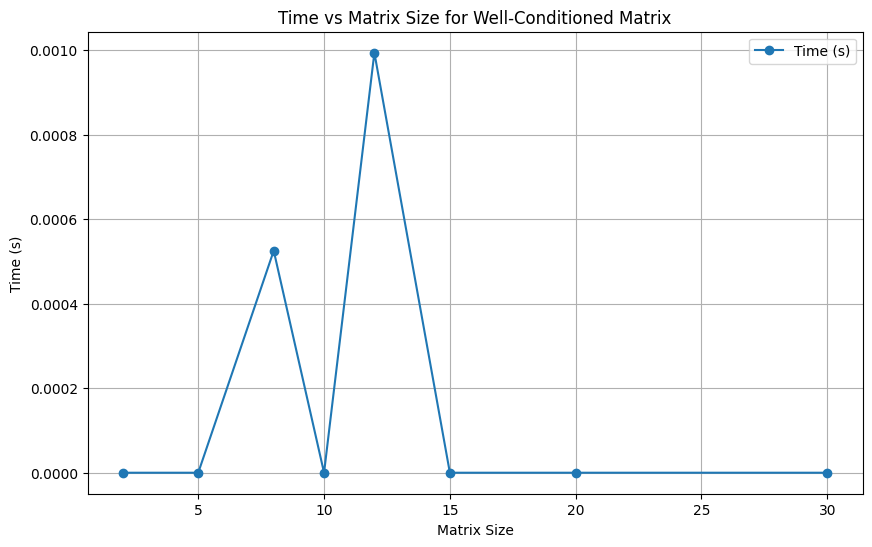

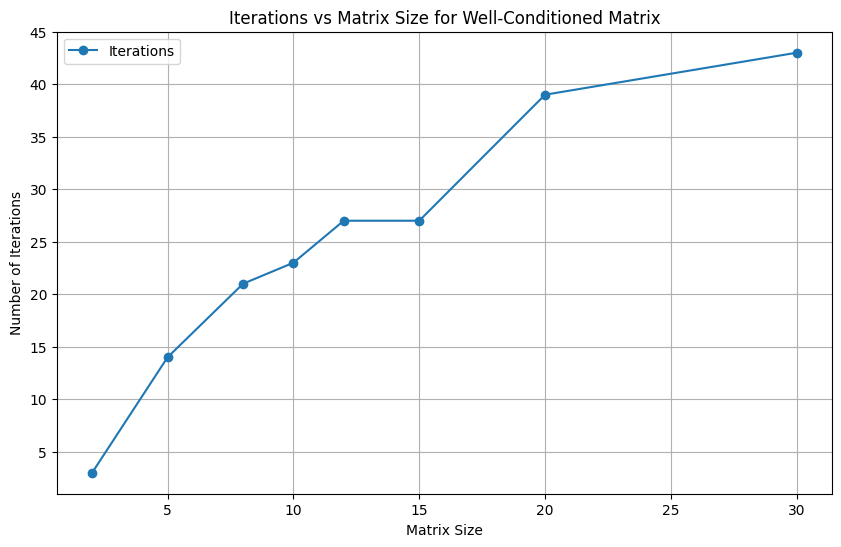

In [38]:
well_times = [result["Well-Conditioned Time (s)"] for result in results_timing]
well_iterations = [result["Well-Conditioned Iteration"] for result in results_timing]

#Хорошо обусловленные матрицы
plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, well_times, marker='o', label="Time (s)")
plt.xlabel("Matrix Size")
plt.ylabel("Time (s)")
plt.title("Time vs Matrix Size for Well-Conditioned Matrix")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, well_iterations, marker='o', label="Iterations")
plt.xlabel("Matrix Size")
plt.ylabel("Number of Iterations")
plt.title("Iterations vs Matrix Size for Well-Conditioned Matrix")
plt.grid()
plt.legend()
plt.show()


## Зависимость кол-ва итераций от диагонального преобладания в матрице

In [40]:
def generate_diagonal_dominance_matrices(size):
    random_matrix = np.random.rand(size, size)
    diag_dominant = np.dot(random_matrix.T, random_matrix)
    np.fill_diagonal(diag_dominant, diag_dominant.diagonal() + size)

    non_diag_dominant = np.random.rand(size, size)
    non_diag_dominant = np.dot(non_diag_dominant.T, non_diag_dominant) 
  
    np.fill_diagonal(non_diag_dominant, non_diag_dominant.diagonal() - size / 2)
    
    return diag_dominant, non_diag_dominant

In [45]:
matrix_sizes_varied = [3, 4, 5, 6, 7]

results_varied_sizes = []

for size in matrix_sizes_varied:
    b = np.random.rand(size, 1)

    diag_dominant, non_diag_dominant = generate_diagonal_dominance_matrices(size)

    try:
        start_time = time.time()
        _, diag_dom_iter = gradient_descent_solve(diag_dominant, b, eps=1e-6)
        diag_dom_time = time.time() - start_time
    except:
        diag_dom_iter = -1
        diag_dom_time = float('inf')

    try:
        start_time = time.time()
        _, non_diag_dom_iter = gradient_descent_solve(non_diag_dominant, b, eps=1e-6)
        non_diag_dom_time = time.time() - start_time
    except:
        non_diag_dom_iter = -1
        non_diag_dom_time = float('inf')
    
    results_varied_sizes.append({
        "Matrix Size": size,
        "Diagonal Dominant Time (s)": diag_dom_time,
        "Diagonal Dominant Iteration": diag_dom_iter,
        "Non-Diagonal Dominant Time (s)": non_diag_dom_time,
        "Non-Diagonal Dominant Iteration": non_diag_dom_iter
    })

sizes_varied = [result["Matrix Size"] for result in results_varied_sizes]
diag_times_varied = [result["Diagonal Dominant Time (s)"] for result in results_varied_sizes]
non_diag_times_varied = [result["Non-Diagonal Dominant Time (s)"] for result in results_varied_sizes]
diag_iterations_varied = [result["Diagonal Dominant Iteration"] for result in results_varied_sizes]
non_diag_iterations_varied = [result["Non-Diagonal Dominant Iteration"] for result in results_varied_sizes]

C:\Users\Huawei\AppData\Local\Temp\ipykernel_11652\556338144.py:7: RuntimeWarning: invalid value encountered in divide
  alpha = np.dot(r.T, r) / np.dot(r.T, np.dot(A, r))  # Optimal step size


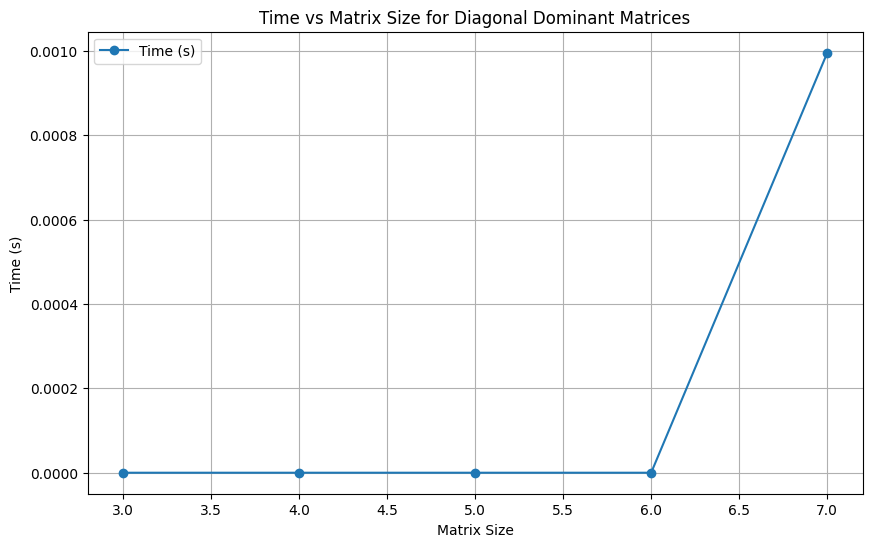

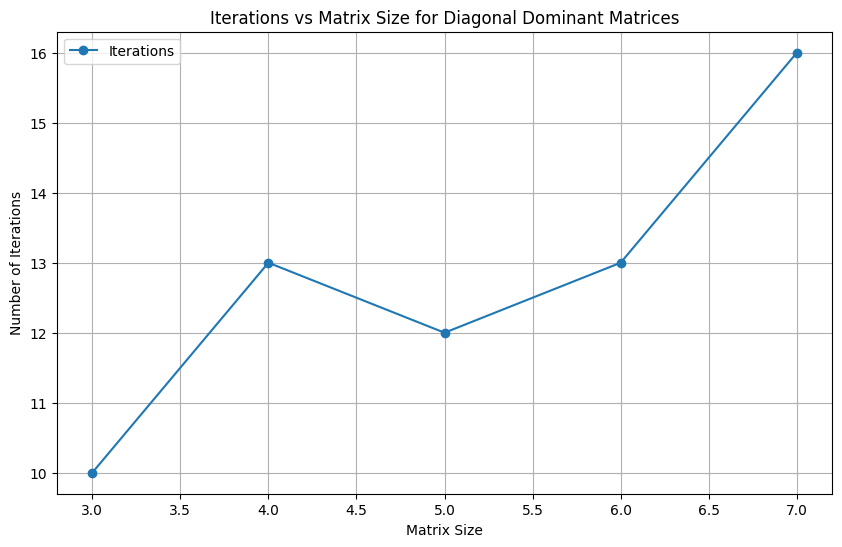

In [47]:
# Матрица с диагональным преобладанием
plt.figure(figsize=(10, 6))
plt.plot(sizes_varied, diag_times_varied, marker='o', label="Time (s)")
plt.xlabel("Matrix Size")
plt.ylabel("Time (s)")
plt.title("Time vs Matrix Size for Diagonal Dominant Matrices")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(sizes_varied, diag_iterations_varied, marker='o', label="Iterations")
plt.xlabel("Matrix Size")
plt.ylabel("Number of Iterations")
plt.title("Iterations vs Matrix Size for Diagonal Dominant Matrices")
plt.grid()
plt.legend()
plt.show()


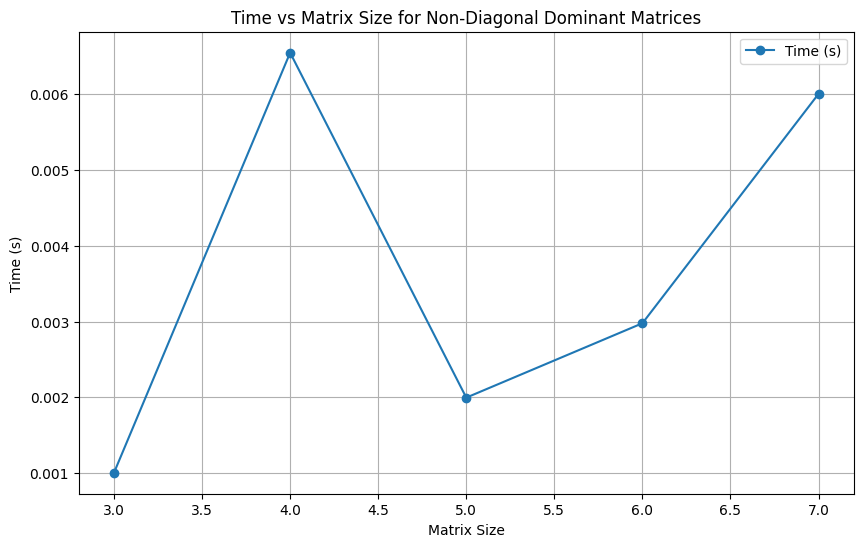

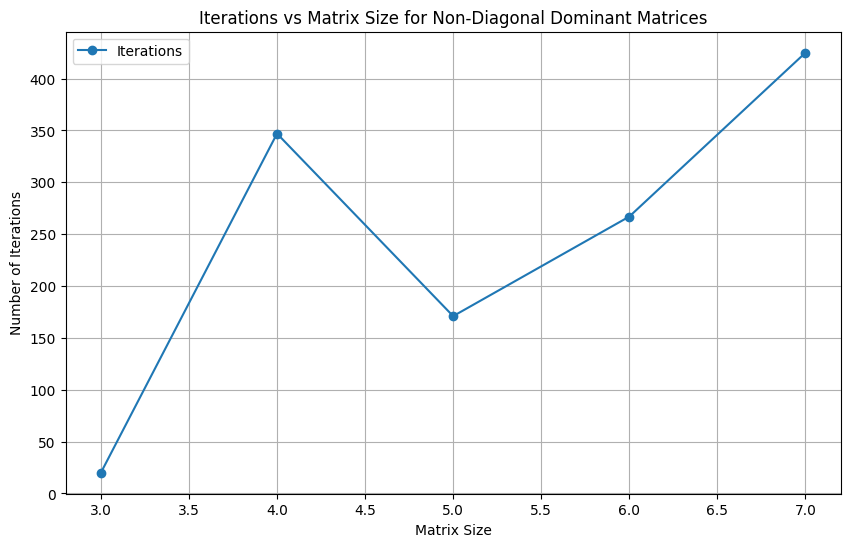

In [48]:
# Матрица без диагонального преобладания
plt.figure(figsize=(10, 6))
plt.plot(sizes_varied, non_diag_times_varied, marker='o', label="Time (s)")
plt.xlabel("Matrix Size")
plt.ylabel("Time (s)")
plt.title("Time vs Matrix Size for Non-Diagonal Dominant Matrices")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(sizes_varied, non_diag_iterations_varied, marker='o', label="Iterations")
plt.xlabel("Matrix Size")
plt.ylabel("Number of Iterations")
plt.title("Iterations vs Matrix Size for Non-Diagonal Dominant Matrices")
plt.grid()
plt.legend()
plt.show()